In [1169]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import load_model
from keras.models import Sequential
import enchant
import difflib

In [1170]:
model = load_model('model.h5')
LB = LabelBinarizer()
train_Y = []
a_file = open("train_Y.txt", "r")
for line in a_file:
  stripped_line = line.strip()
  train_Y.append(stripped_line)
a_file.close()
val_Y = []
b_file = open("val_Y.txt", "r")
for line in b_file:
  stripped_line = line.strip()
  val_Y.append(stripped_line)
b_file.close()

In [1171]:
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [1172]:
def sort_contours(cnts):
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][0]))
    # return the list of sorted contours
    return cnts

In [1191]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0]
    cnts = sort_contours(cnts)
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 250:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            roi = gray[y:y + h, x:x + w]
            thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
            thresh = thresh.astype("float32") / 255.0
            thresh = thresh.reshape(1,32,32,1)
            ypred = model.predict(thresh)
            ypred = LB.inverse_transform(ypred)
            letters.append(*ypred)
    return letters, image

In [1192]:
def get_word(letter):
    prediction = "".join(letter)
    dictionary = enchant.Dict("en_US")
    if dictionary.check(prediction):
        return prediction, '\n100% match'
    else:
        sim = dict() 
        suggestions = set(dictionary.suggest(prediction))

        for word in suggestions:
            measure = difflib.SequenceMatcher(None, prediction, word).ratio()
            sim[measure] = word
        
        if not suggestions:
            return prediction, '\nUnrecognizable'
        elif len(suggestions) == 1:
            return prediction, "\nMost likely the word is:", sim[max(sim.keys())]
        else:
            return prediction, "\nMost likely the word is:", sim[max(sim.keys())], '\nAll suggestions', dictionary.suggest(prediction)

KCBROWN 
Most likely the word is: KC-BROWN 
All suggestions ['KC BROWN', 'KC-BROWN', 'BROWN']


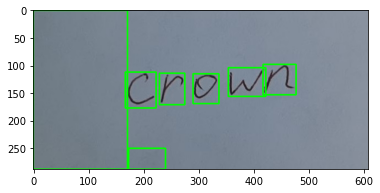

In [1193]:
letter,image = get_letters("crown_smaller.jpg")
word = get_word(letter)
print(*word)
plt.imshow(image)

TOUSE 
Most likely the word is: TOUSLE 
All suggestions ['TOUCHE', 'ROUSE', 'TOUSLE', 'SOUSE', 'TORSE', 'LOUSE', 'DOUSE', 'MOUSE', 'HOUSE', 'BOUSE', 'TO USE', 'TO-USE', 'TOULOUSE', 'OUSE']


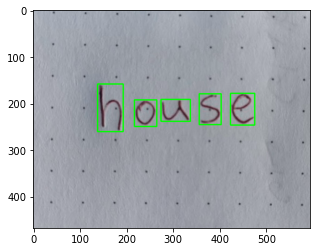

In [1168]:
letter,image = get_letters("house.jpg")
word = get_word(letter)
print(*word)
plt.imshow(image)

KUSSGLA 
Most likely the word is: SUNGLASS


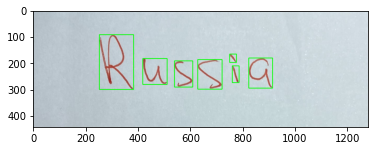

In [1153]:
letter,image = get_letters("russia.jpg")
word = get_word(letter)
print(*word)
plt.imshow(image)

CROWN 
100% match


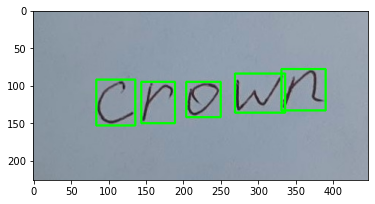

In [1154]:
letter,image = get_letters("crown_bright.jpg")
word = get_word(letter)
print(*word)
plt.imshow(image)

TUBTE 
Most likely the word is: TUBATE 
All suggestions ['BUTTE', 'TUBE', 'TUBATE']


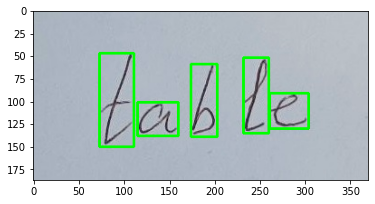

In [1155]:
letter,image = get_letters("table_bright.jpg")
word = get_word(letter)
print(*word)
plt.imshow(image)

WORD 
100% match


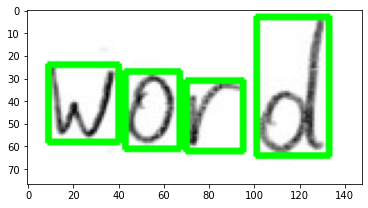

In [1146]:
letter,image = get_letters("word.jpg")
word = get_word(letter)
print(*word)
plt.imshow(image)

HALLDWEEN 
Most likely the word is: HALLOWEEN


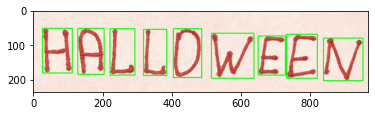

In [1147]:
letter,image = get_letters("halloween.jpeg")
word = get_word(letter)
print(*word)
plt.imshow(image)

PLNEAFPLE 
Most likely the word is: PINEAPPLE


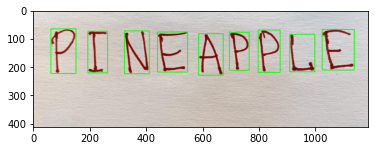

In [1148]:
letter,image = get_letters("PINEAPPLE.jpeg")
word = get_word(letter)
print(*word)
plt.imshow(image)